In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.metrics import r2_score

In [2]:
diamonds = pd.read_csv('diamonds.csv')

In [3]:
rick = pd.read_csv('rick.csv')

In [4]:
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
48935,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58
48936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
48937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
48938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56


In [5]:
cuts = list(diamonds['cut'].value_counts().index)
cuts.reverse()
n_cut={}
for item in cuts:
    n_cut.update({item:cuts.index(item)})

In [6]:
colors = list(diamonds['color'].value_counts().index)
colors.sort()
colors.reverse()
n_color = {}
for item in colors:
    n_color.update({item:colors.index(item)})

In [7]:
clarity = ['I1' , 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
n_clarity = {}
for item in clarity:
    n_clarity.update({item:clarity.index(item)})

In [8]:
diamonds['n_cut'] = diamonds['cut'].map(n_cut)
diamonds['n_color'] = diamonds['color'].map(n_color)
diamonds['n_clarity'] = diamonds['clarity'].map(n_clarity)

In [9]:
diamonds = diamonds.drop(diamonds[diamonds["x"]==0].index)
diamonds = diamonds.drop(diamonds[diamonds["y"]==0].index)
diamonds = diamonds.drop(diamonds[diamonds["z"]==0].index)

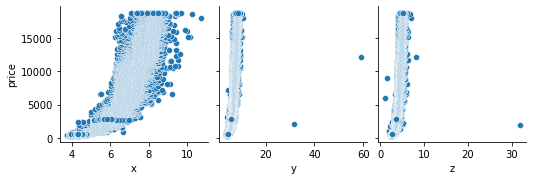

In [10]:
sns.pairplot(diamonds,y_vars='price',x_vars=['x','y','z'])

In [11]:
diamonds = diamonds[diamonds['y']<20]
diamonds = diamonds[diamonds['z']<20]
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z,n_cut,n_color,n_clarity
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3,5,2
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1,5,4
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3,1,3
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,0,1
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,2,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48935,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58,3,6,2
48936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,4,6,2
48937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,1,6,2
48938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,2,6,2


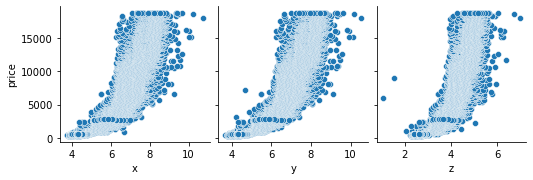

In [12]:
sns.pairplot(diamonds,y_vars='price',x_vars=['x','y','z'])

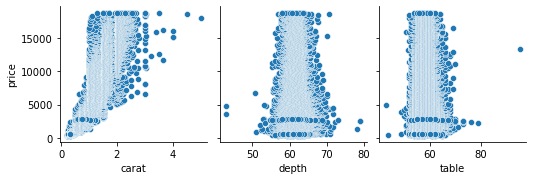

In [13]:
sns.pairplot(diamonds,y_vars='price',x_vars=['carat','depth','table'])

In [14]:
diamonds.describe()

,carat,depth,table,price,x,y,z,n_cut,n_color,n_clarity
count,48919.000000,48919.000000,48919.000000,48919.000000,48919.000000,48919.000000,48919.000000,48919.000000,48919.000000,48919.000000
mean,0.797542,61.752129,57.450972,3932.259531,5.731108,5.733026,3.539247,2.906519,3.407408,3.055888
std,0.473860,1.429713,2.232979,3986.815307,1.119607,1.111665,0.691664,1.116570,1.700020,1.645459
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000,2.000000,2.000000,2.000000
50%,0.700000,61.800000,57.000000,2400.000000,5.690000,5.710000,3.520000,3.000000,3.000000,3.000000
75%,1.040000,62.500000,59.000000,5331.000000,6.540000,6.540000,4.040000,4.000000,5.000000,4.000000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,10.540000,6.980000,4.000000,6.000000,7.000000


In [15]:
diamonds.corr()['price']

carat        0.922169
depth       -0.012051
table        0.127931
price        1.000000
x            0.887883
y            0.889554
z            0.882824
n_cut       -0.055141
n_color     -0.173001
n_clarity   -0.148569
Name: price, dtype: float64

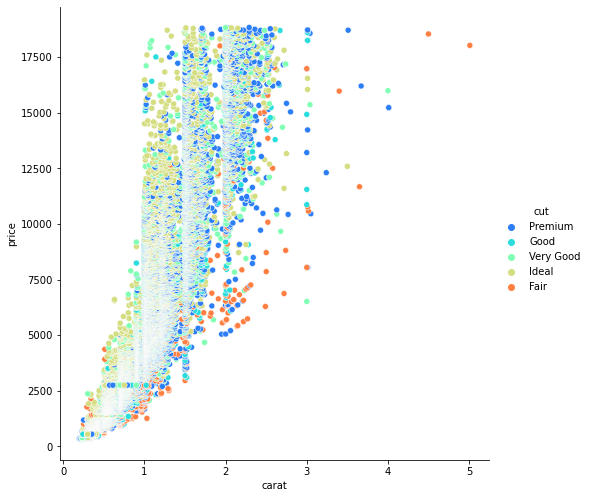

In [16]:
sns.pairplot(diamonds,y_vars='price', x_vars ='carat', hue = 'cut',palette = 'rainbow',height = 7)

In [17]:
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z,n_cut,n_color,n_clarity
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3,5,2
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1,5,4
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3,1,3
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,0,1
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,2,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48935,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58,3,6,2
48936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,4,6,2
48937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,1,6,2
48938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,2,6,2


In [18]:
modelo = RandomForestRegressor()

In [19]:
X=diamonds[['carat','n_cut','x','y','z','n_color','n_clarity','depth','table']]
y=diamonds['price']
modelo.fit(X,y)

RandomForestRegressor()

In [20]:
y_pred=modelo.predict(X)

In [21]:
np.sqrt(mean_squared_error(y, y_pred))

200.5118703471144

In [22]:
r2_score(y,y_pred)

0.9974704875579921

In [61]:
X_rick = rick[['carat','n_cut','x','y','z','n_color','n_clarity','depth','table']]
price_pred = modelo.predict(X_rick)

In [62]:
rick['price_predicted']=price_pred

In [64]:
rick.to_csv('rick.csv')